# Coursework EMAT30008 2024 #
Student no: 2113223

## Demos ##

Import packages and solver module "solvers"

In [1]:
import solvers
import numpy as np
import matplotlib.pyplot as plt
import timeit

### Question 1 ###
a) Throughout the solvers module, first order systems of ODEs are represented as a function f(x,t,p) of state variables x, time t and ode parameters p such that $ \frac{d\mathbf{x}}{dt} = f(\mathbf{x},t,\mathbf{p})$.

In [273]:
#Set up the Brusselator system as a function of x (numpy array), t (float) and parameters (numpy array)
def brusselator(x, t, p):
    dx = p[0] + x[0]**2 * x[1] - (p[1] + 1) * x[0]
    dy = p[1] * x[0] - x[0]**2 * x[1]
    return np.array([dx, dy])

#define parameters A and B and form parameter array p
A = 1
B = 3
p = np.array([A, B])

The function solve_to numerically integrates first order systems of ODEs from initial time t0 to final time t_f given an initial condition x0.

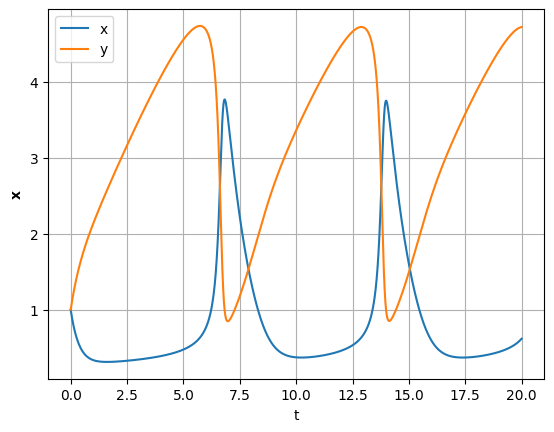

In [274]:
#Set up the initial conditions
x0 = np.array([1, 1])

#Set up t0 and t_f
t0 = 0
t_f = 20

#Solve system using default method (RK4) and time-step (1e-3)
x, t = solvers.solve_to(brusselator,p, x0, t0, t_f)

#plot the time series of x and y against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.grid(True)
plt.legend()
plt.show()

b) The function shoot_solve numerically solves BVPs given boundary conditions and a phase condition (specified as functions of the ode, parameters p and the solution array from the numerical integration xs). The default funtion for the boundary condition is the limit cycle condition (xs[:,-1]-xs[:,0] = 0) and the default phase condition is $\frac{dx_1}{dt}\vert_{t=0} = 0$ (ode([xs[:,0]],0,p) = 0). From the plot, the starting point of the limit cycle that satisfies zero velocity in x looks like $\mathbf{x_{LC}} \approx \left[0.5, 3.5\right]$ and the period looks to be $T\approx 7.5$. Thus these will be the initial guesses provided to shoot_solve.

The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = 7.16.
The initial point on the limit cycle that satisfies the phase condition is [0.37 3.49].


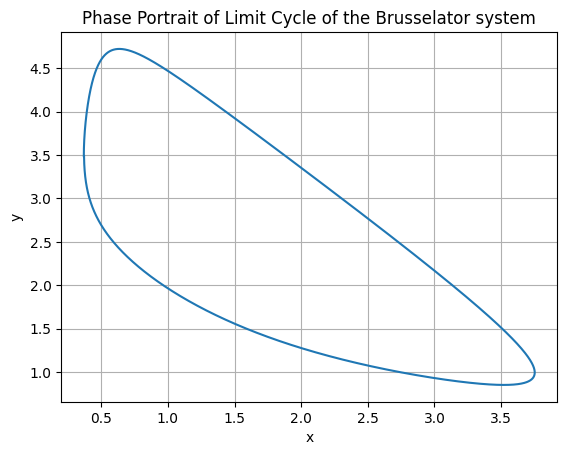

In [294]:
#set up initial guesses
x0 = np.array([0.5, 3.5])
T0 = 7.5
#use numerical shooting to find the point on the limit cycle
x_LC,T = solvers.shoot_solve(brusselator, p, x0,T0)

#Print the period T of the oscillations to 2 decimal places
print(f'The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.')
#Print the initial point on the limit cycle that satisfies the phase condition
print(f'The initial point on the limit cycle that satisfies the phase condition is {np.round(x_LC,2)}.')
xs,_ = solvers.solve_to(brusselator, p, x_LC, t0, T)
#Plot x against y for 1 period of the oscillations.
plt.figure()
plt.plot(xs[0,:], xs[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait of Limit Cycle of the Brusselator system')
plt.grid(True)
plt.show()

c) The function bifurcation_analysis tracks attractors of systems of ODEs. It does this using natural parameter or pseudo-arclength continuation (default is natural parameter continuation). The boolean input variable LC can be set to False and only equilibria will be tracked. This increases computational speed as shooting is not required, but in our case we are interested in limit cycles. The initial parameter array p0, the index p_ind of the varying parameter within the parameter array must be specified, as well as the number of steps N and the size of the natural parameter steps h. An initial guess x0 for the attractor (point on the LC or equilibrium) must be provided, and, when computing limit cycles, a positive number T0 must be provided as an initial guess for the period of the limit cycle. We will use the output of part b) as the initial guesses for the limit cycle at B = 3. The phase condition used is again the default phase condition.

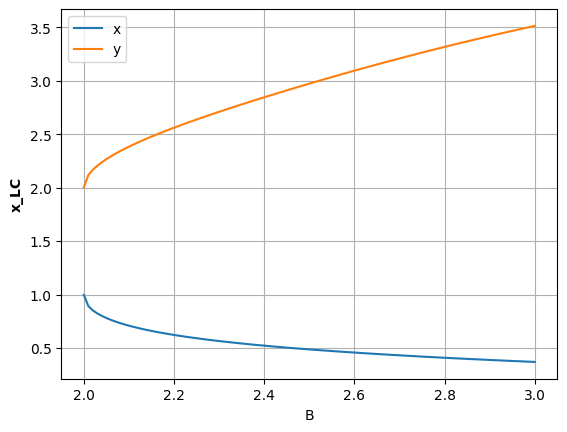

In [295]:
#Set up the initial array of parameters p0
B0 = 3
p0 = np.array([A, B0])

#We use step size of h = 1e-2 for the natural parameter continuation.
#The step must be negative to move B = 2.
h=-1e-2

#The number of iterations to reach B = 2 is computed
Bend = 2
N = int((Bend-B0)/h)

x0 = x_LC
T0 = T

#We use natural parameter continuation to find the branch of LCs that emerges from the Hopf bifurcation at B = 2
xs, Ts, ps = solvers.bifurcation_analysis(brusselator, p0,x0,p_ind = 1, T0 = T0, N=N, h = h)

#Plot the x and y values of the limit cycles against B
plt.figure()
plt.plot(ps[1,:], xs[0,:], label = 'x')
plt.plot(ps[1,:], xs[1,:], label = 'y')
plt.xlabel('B')
plt.ylabel('x_LC', fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

### Question 2 ###
The extended Hopf bifurcation normal form is set up as a function of x, t and p.

In [276]:
#Set up the extended Hopf Bifurcation normal form
def hopf(x, t, p):
    r_squared = (x**2).sum()
    dx = p[0] * x[0] - x[1] - x[2] + x[0] * r_squared - x[0] * r_squared**2
    dy = x[0] + p[0] * x[1] - x[2] + x[1] * r_squared - x[1] * r_squared**2
    dz = x[0] + x[1] + p[0] * x[2] + x[2] * r_squared - x[2] * r_squared**2
    return np.array([dx, dy, dz])

a) The solve_to function is used to perform numerical integration, again using default Runge-Kutta 4th order solver with default max step size of 0.01.

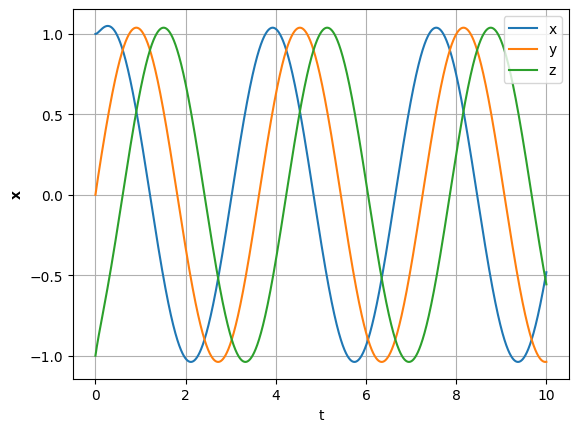

In [362]:
#Set up the parameter value,
beta = 1
#initial conditions,
x0 = np.array([1, 0, -1])
#and time domain,
t0 = 0
t_f = 10

#Solve the system using the RK4 method
x, t = solvers.solve_to(hopf, beta, x0, t0, t_f)

#Plot the time series of x, y and z against t
plt.figure()
plt.plot(t, x.T, label = ['x','y','z'])
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

b) Numerical shooting function shoot_solve is used again with default phase condition. The initial guess for point on the limit cycle satisfying zero velocity in x is inferred from the time series plot as $\mathbf{x_{LC}} \approx \left[-1.2, -0.5, -0.7\right]$ and the initial guess is $T \approx 4$.

The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = 3.63.
The initial point on the limit cycle that satisfies the phase condition is [-1.05 -0.51  0.51].


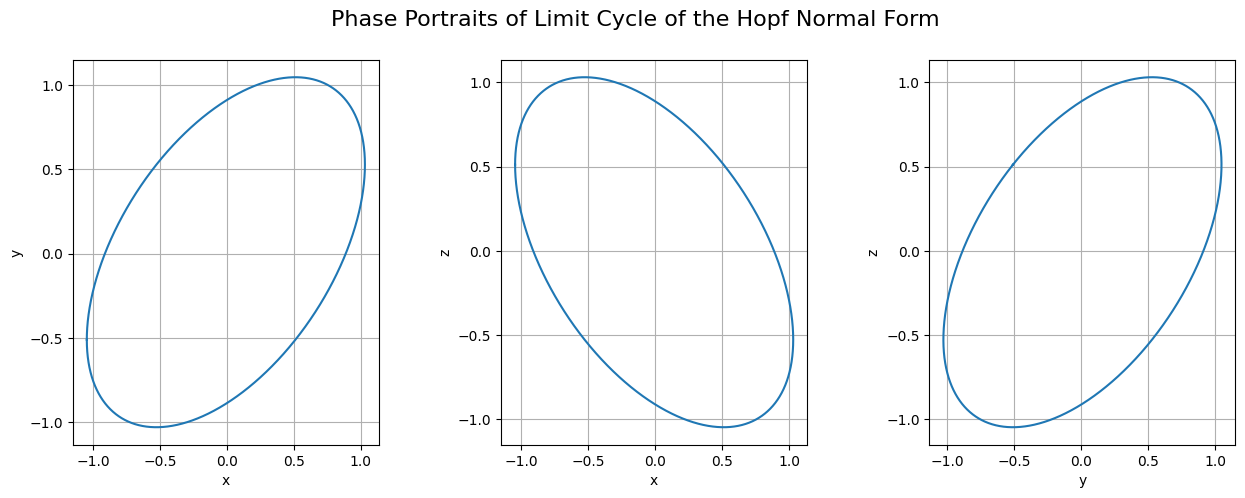

In [371]:
x0 = np.array([-1.2,-0.5,0.7])
T0 = 4
x_LC,T = solvers.shoot_solve(hopf, beta, x0,T0, delta_max = 1e-3)

print(f"The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.")
print(f"The initial point on the limit cycle that satisfies the phase condition is {np.round(x_LC,2)}.")


#Numerically integrate limit cycle
xs,t = solvers.solve_to(hopf, beta, x_LC, t0, T, delta_max = 1e-3)

#plot phase portraits
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

axs[0].plot(xs[0, :], xs[1, :])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].plot(xs[0, :], xs[2, :])
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].grid(True)

axs[2].plot(xs[1, :], xs[2, :])
axs[2].set_xlabel('y')
axs[2].set_ylabel('z')
axs[2].grid(True)

fig.suptitle('Phase Portraits of Limit Cycle of the Hopf Normal Form', fontsize=16)
plt.show()

The time series of one oscillation of the limit cycle is plotted to ensure the correct limit cyle was found.

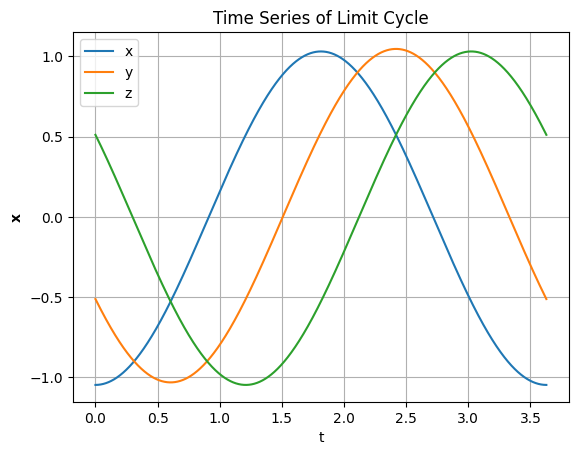

In [372]:
plt.figure()
plt.plot(t,xs.T, label = ['x','y','z'])
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.grid(True)
plt.legend()
plt.title('Time Series of Limit Cycle')
plt.show()

c) The same function as in 1.c) "bifurcation_analysis" will be used to find the branches of limit cycles that emerge from the Hopf bifurcation at $\beta = 0$. To employ pseudo-arclength continuation, the kwarg "cont_type" is set to "pseudo_arclength" as the default value performs natural parameter continuation. The values for initial step size and the number of iterations were chosen as to strike a balance between computation time and smoothness of the bifurcation diagram, ensuring that the dynamics of the system around beta = 0 are fully captured. Again, initial value h must be negative to send the continuation towards the bifurcation point at $\beta = 0$.

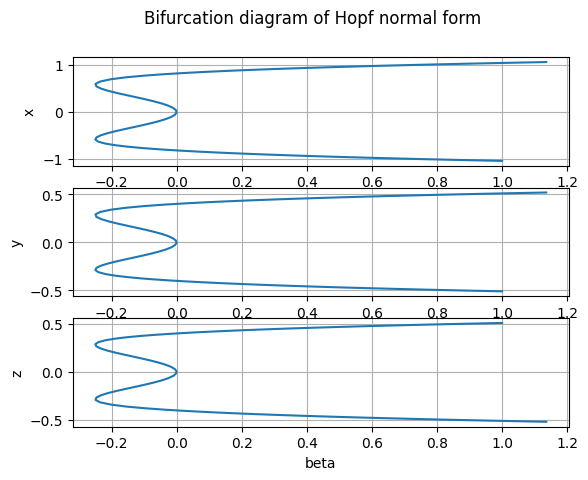

In [374]:
#We will use the outputs x_LC and T of the shooting method initial guesses for the pseudo-arclength continuation.
x0 = x_LC
T0 = T


#set up initial natural parameter continuation step size (innit_h) and number of pseudo-arclength steps (innit_h)
innit_h = -5e-2
no_it = 75

#set up cont_type parameter to pseudo-arclength continuation
cont_type = "pseudo_arclength"
#run bifurcation_analysis with pseudo-arclength continuation
xs, Ts, ps = solvers.bifurcation_analysis(hopf, beta, x0, T0 = T0, h = innit_h, N = no_it, cont_type = cont_type)


#Plot the x, y and z values of the limit cycles against beta
plt.figure()
plt.subplot(311)
plt.plot(ps[0,:],xs[0,:], label = 'x')
plt.ylabel('x')
plt.grid(True)

plt.subplot(312)
plt.plot(ps[0,:],xs[1,:], label = 'y')
plt.ylabel('y')
plt.grid(True)

plt.subplot(313)
plt.plot(ps[0,:],xs[2,:], label = 'z')
plt.ylabel('z')
plt.xlabel('beta')
plt.suptitle('Bifurcation diagram of Hopf normal form')
plt.grid(True)
plt.show()


### Question 3 ###
The finite_diff function solves second order ODEs of the form $D\frac{d^2u}{dx^2} + P \frac{du}{dx} + q((u),x,p) = 0$. As there is no dependency on u in the source term, the source term is just a function of space variable $x$ and parameter arary $p$. The boundary conditions are input to the solver as Boundary_Condition objects.

In [19]:
#Define source term q(x,sig) as a function of x and sig.
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#Define the boundary conditions as Boundary_Condition objects.
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#We set the diffusion coefficients D=1 and P =0
D = 1
P=0

a) For 51 grid points, a value of $N=50$ is input to the solving function.

No initial guess provided, defaulting to zero vector. Results can be improved by providing an adequate initial guess.
Newton method converged within the tolerance after 1 iterations
The value of u(x) at x = 0.0 for sig = 0.5, to 5 significant figures, is -0.69513.
No initial guess provided, defaulting to zero vector. Results can be improved by providing an adequate initial guess.
Newton method converged within the tolerance after 1 iterations
The value of u(x) at x = 0.0 for sig = 0.1, to 5 significant figures, is -0.53936.


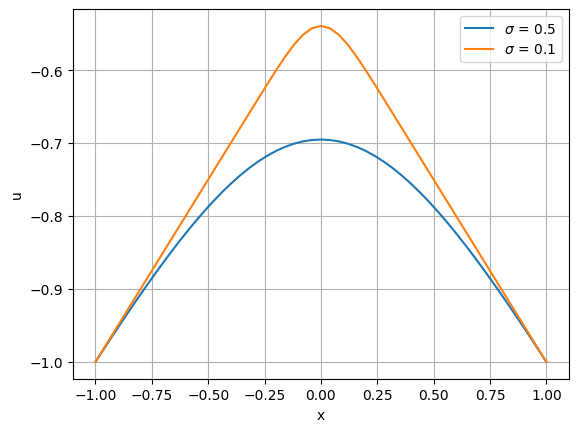

In [21]:
N=50
#i)
#Define the value of parameter sig = 0.5,
sig = 0.5
#and use numpy linear solver.
solver = "np_solve"

#Solve the system using the second order solver.
u_np,x = solvers.finite_diff(bc_left, bc_right, q, sig, N, D=D, P=P, solver = solver)

#We want to print u(x) at x = 0.
#As x = 0 is the 25th grid point, we print u_np[25].
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_np[25],5)}.")


#ii)
#Define the value of parameter sig = 0.1,
sig = 0.1
#and use the scipy sparse matrix linear solver.
solver = "sparse"
u_sparse,x = solvers.finite_diff(bc_left, bc_right, q, sig, N, D=D, solver = solver)
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_sparse[25],5)}.")

#We plot the solutions u(x) for sig = 0.5 and sig = 0.1.
plt.plot(x,u_np,label = f"$\sigma$ = 0.5")
plt.plot(x,u_sparse,label = f"$\sigma$ = 0.1")
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()

b) The setup code is the same for both solvers. For 501 grid points, a value of $N=500$ is input to finite_diff. To get an accurate value for the time taken to run each method, they are run 100 times each and the total time is divided by 100.

In [12]:
#Define setup code as a docstring
setup = """
import solvers
import numpy as np
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#setup both boundary conditions
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#initialise parameters of the problem
N = 500
sig = 0.05
D = 1
P=0
"""

#Define timed code for each method
timed_code_np = """
#define the solver to be used
solver = "np_solve"
u,x = solvers.finite_diff(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""
timed_code_sparse = """
#define the solver to be used
solver = "sparse"
u,x = solvers.finite_diff(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""

#Time the code for 25 iterations and calculate the time taken per iteration.
number = 25
time_np = timeit.timeit(setup = setup, stmt = timed_code_np, number = number)
time_sparse = timeit.timeit(setup = setup, stmt = timed_code_sparse, number = number)

print("Numerical integration using the numpy linear system solver took on average {0:.2f} ms. to run.".format(1000 * time_np/number))
print("Numerical integration using the scipy sparse matrix linear system solver took on average {0:.2f} ms to run.".format(1000 * time_sparse/number))

Numerical integration using the numpy linear system solver took on average 156.14 ms. to run.
Numerical integration using the scipy sparse matrix linear system solver took on average 1.32 ms to run.


Scipy's sparse linear system solver was a lot faster than numpy's dense matrix linear system solver. This can be explained by the fact the linear system being solved is large (499x499) and the matrices are tridiagonal and, thus, have a lot of zero values.

### Question 4 ###
The PDE solver meth_lines solves problems of the form $\frac{\partial u}{\partial t} =  D\frac{\partial^2u}{\partial x^2} + P \frac{\partial u}{\partial x} + q(u,x,t,p)$, given boundary conditions as Boundary_Condition objects and itial condition $u(x,t_0) = f(x,t_0)$. Again, for 101 equally spaced grid points in the x variable, $N=100$.

In [14]:
#Define problem parameters
D = 0.5
P=0
L =2
t0,T = 0, 0.5
N = 100

#define the source term q(x,t) = 0
def q(u,x,t,p):
    return np.zeros(len(x))

#setup boundary conditions
bc_left = solvers.Boundary_Condition("Neumann",0,1)
bc_right = solvers.Boundary_Condition("Dirichlet",L,0)

#define initial condition f(x,t0) = u(x,0)
def f(x,t0):
    return  0.5 * x * (L - x)

a)    
The maximum time step that can be used in the explicit Euler method is given by $\Delta t_{max} = \frac{(\Delta x)^2}{2D}$, where $\Delta x$ is the step size of the discretisation of the space variable and $D$ is the diffusion coefficient. The value of $\Delta x$ is found using the Grid object that is usualy formed within the PDE solver. It takes as inputs $N$,$x_0$, and $x_N$.

In [15]:
#Compute discretisation of space by making a Grid object
grid = solvers.Grid(N,0,L)
#Extract dx from grid object
dx = grid.dx

#Compute maximum step size that can be used for explicit Euler method 
dt_max = dx**2/(2*D)
print(f"The maximum time step size for the explicit Euler method is$ {dt_max}.")

The maximum time step size for the explicit Euler method is $\Delta t = $ 0.0004.


b) The PDE solver has a boolean kwarg implicit which determines wether or not the numerical differentiation is computed using the implicit Euler method or using explicit methods. There are also variables explicit_solver and implicit_solver which define which solver is used within each method. The former can be either "Euler" or "RK4" and determine which method is used in the time integration. The latter determines the linear system solver used at each time-step to solve the system arising from the 

The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is -0.2496. 
The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is -0.2496. 


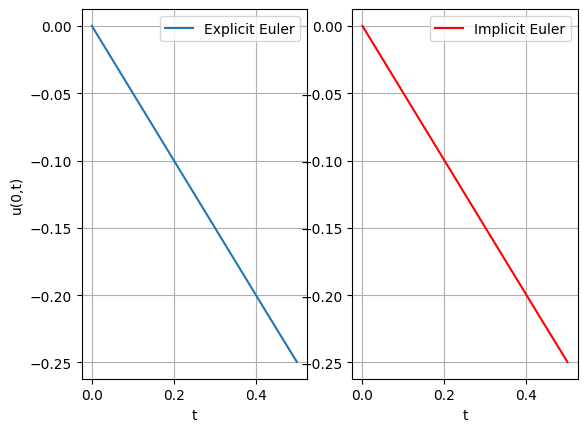

0.5


In [18]:
#i)
#We define time step size and solver for explicit Euler method
dt_explicit = 0.5 * dt_max 
explicit_solver = "Euler"

u_explicit,x,t_explicit = solvers.meth_lines(bc_left, bc_right,f, t0, T, q, p = 0, N=N, D = D, P=P, dt = dt_explicit, implicit = False, explicit_solver = explicit_solver)

#The first dimension of the solution array u_explicit is the spatial dimension, 
#and the second dimension is the time dimension. Thus the value of u(0,T) is u_explicit[0,-1].
print("The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_explicit[0,-1]))


#ii)
#We define time step size and solver for implicit Euler method.
#We use scipy sparse matrix solver to solve the system of equations that arises from
#the implicit Euler method. 
dt_implicit = 2 * dt_max
implicit_solver = "sparse"
#Note that diffusion_solve will employ explicit method iunless implicit_solver is specified.

u_implicit,x,t_implicit = solvers.meth_lines(bc_left,bc_right,f,t0,T,q,p = 0,N=N, D = D, dt = dt_implicit,implicit_solver = implicit_solver)
print("The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_implicit[0,-1]))

#Plot u(0,t) against t for both methods
plt.figure()
plt.subplot(121)
plt.plot(t_explicit,u_explicit[0,:], label = "Explicit Euler")
plt.xlabel('t')
plt.ylabel('u(0,t)')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.plot(t_implicit,u_implicit[0,:],color = 'r', label = "Implicit Euler")
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()

### Question 5 ###

In [194]:
#Define the parameters of the problem
D = 0.01
L = 6
T = 100
p=np.nan
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)

#Define the reaction term q(u,x,t,p)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)

#Define initial condition f(x,t0)
def f(x,t0):
    return np.zeros(len(x))


a)     
The problem will be solved using the IMEX method, solving the linear systems that arise at each time-step with the Thomas algorithm and using Scipy's sparse matrix solver.

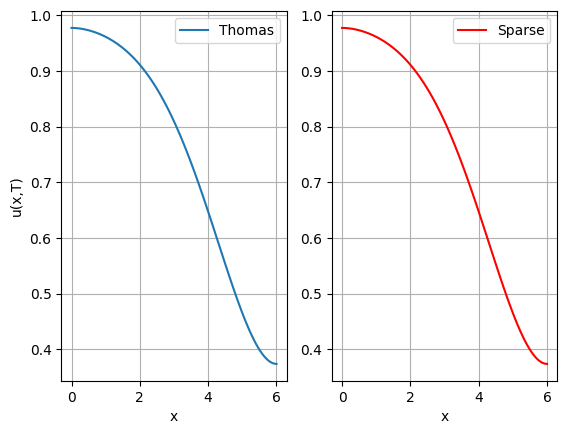

In [195]:
N = 100
dt = 0.5

solver_implicit = "thomas"
u_thom,x_thom,t_thom = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = solver_implicit, dt = dt)

solver_implicit = "sparse"
u_sparse,x_sparse,t_sparse = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = solver_implicit, dt = dt)

#Plot u(x,t) at t = T for both methods
plt.figure()
plt.subplot(121)
plt.plot(x_thom,u_thom[:,-1], label = "Thomas")
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.grid(True)
plt.legend()
plt.subplot(122)
plt.plot(x_sparse,u_sparse[:,-1],color = "r" ,label = "Sparse")
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.show()
#plot solution

b)     
Time the code using timeit function.

In [196]:
setup_code = """
import solvers
import numpy as np
D = 0.01
L = 6
T = 100
p=np.nan
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)
def f(x,t0):
    return np.zeros(len(x))
N = 100
dt = 0.5
"""
timed_thomas = """
solver_implicit = "thomas"
u_thom,x_thom,t_thom = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = solver_implicit, dt = dt)
"""
timed_sparse = """
solver_implicit = "sparse"
u_sparse,x_sparse,t_sparse = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = solver_implicit, dt = dt)
"""

number = 15
time_thomas = timeit.timeit(setup = setup_code, stmt = timed_thomas, number = number)
time_sparse = timeit.timeit(setup = setup_code, stmt = timed_sparse, number = number)

print("The Thomas algorithm took {0:.2f} ms per iteration.".format(1000 * time_thomas/number))
print("The scipy sparse matrix solver took {0:.2f} ms per iteration.".format(1000 * time_sparse/number))

The Thomas algorithm took 56.04 ms per iteration.
The scipy sparse matrix solver took 93.18 ms per iteration.


Thus, to solve the problem 100 times in a row, I would use the Thomas algorithm as it is the method with the smallest time complexity and it has the same accuracy as the sparse method given that the linear systems solved are the same.


c)   
An accuracy to 4 significant figures will be ensured by tracking the difference in results using increasingly small discretisation steps. At each point of the error estimation, a value of $ \Delta t = \Delta x $ is taken. This choice is slightly arbirtrary, but was made so that to decrease error in the time and space discretisations simultaneously. From part a), we can see that $u(L,T) \approx 0.35 $. Thus, the 4th significant figure corresponds to the 4th decimal place. The value of N will be increased from 10, until an error of less than $10^{-5}$ is detected. This will mean that the value of $u(L,T)$ computed last will be accurate within 4 decimal places, i.e. 4 significant figures in this case. As we have to perform numerical integration many times to run this computation, the Thomas algorithm is used in its capacity as the fastest method.

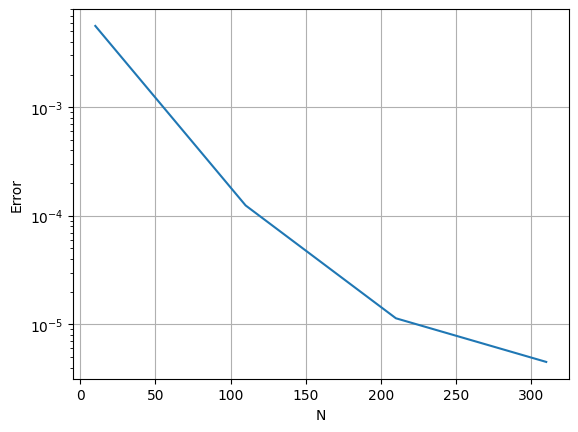

The value of u(L,T) is 0.37300, accurate to 4 significant figures.


In [250]:
#set up array of Ns
Ns = np.arange(10, 10000, 100, dtype = int)
implicit_solver = "thomas"

#get first value of u(L,T)
N = 10
dt = L/N
u,_,_ = solvers.meth_lines(bc_left,bc_right,f,0,T,q,p,N,D = D,implicit_solver = implicit_solver,dt = dt)
u0 = u[-1,-1]

#initialise error array
err = np.zeros(len(Ns))
for i, N in enumerate(Ns[1:]):
    dt = L/N #make dt = dx
    u,_,_ = solvers.meth_lines(bc_left,bc_right,f,0,T,q,p,N,D = D,implicit_solver = implicit_solver,dt = dt)
    u1 = u[-1,-1]
    erri = np.abs(u1 - u0)
    err[i] = erri
    if erri < 1e-5:
        Ns = Ns[:i+1]
        err = err[:i+1]
        break
    u0 = u1

plt.figure()
plt.semilogy(Ns,err)
plt.ylabel("Error")
plt.xlabel("N")
plt.grid(True)
plt.show()

print("The value of u(L,T) is {:.5f}, accurate to within 4 significant figures.".format(u1))


### Question 6 ###
a)     
The finite difference solver solves systems of the form
$ D\frac{d^2u}{dx^2} + P \frac{du}{dx} + q(x,p) = 0 $.
Therefore, the input P to the finite_diff function will be the negative of the value P of the problem.

The maximum value of u for P = 1 is 0.5.
The maximum value of u for P = 10 is 0.7392707558635486.
The maximum value of u for P = 50 is 0.9177831761506433.


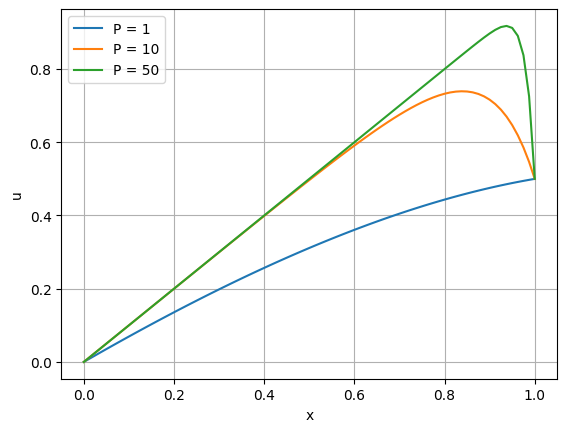

In [252]:
#Set up problem parameters
D = 1
N=80
def q(x,p):
    return np.zeros(len(x)) + p
bc_left = solvers.Boundary_Condition("Dirichlet",0,0)
bc_right = solvers.Boundary_Condition("Dirichlet",1,0.5)

#set up values of P
ps = [1,10,50]


#for each value of P numerically solve the problem, plot the solution and print the max value of u
for p in ps:
    u,x = solvers.finite_diff(bc_left,bc_right,q,p,N=N,D=D,P=-p)
    plt.plot(x,u,label = f"P = {p}")
    print(f"The maximum value of u for P = {p} is {u.max()}.")
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()


b)
To use the natural parameter continuation function, a residual function f must be defined  

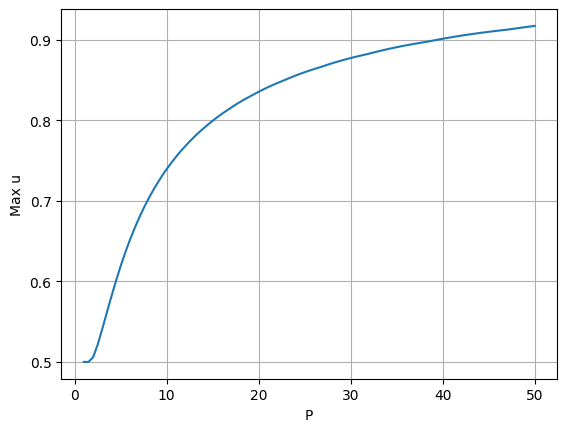

In [255]:
#define a function that is zero when the input is the maximum value of u
def f(u_max,p):
    u,x = solvers.finite_diff(bc_left,bc_right,q,p,N=N,D=D,P=-p)
    return u.max() - u_max

# start at p0 = 1 
p0 = 1
#compute first max value of u
u_max0 = 0.5

#last value of natural parameter continuation is 50
pend = 50

#define step size:
h=0.5

#determine N to reach 50
N = int((pend - p0)/h)

#use natural parameter continuation to find the max value of u for every p
u_max,ps = solvers.parameter_continuation("natural",f,p0,u_max0,h=h,N=N)

#plot the max values of u against p
plt.plot(ps[0,:],u_max[0,:])
plt.xlabel('P')
plt.ylabel('Max u')
plt.grid(True)
plt.show()

## Software Decisions ## 